In [19]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

In [22]:
import os
import wget

### Instagram Scraper: Logging In

In [37]:
driver = webdriver.Chrome(r"")
driver.get(r'https://www.instagram.com/')

username = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']")))
password = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']")))
username.clear()
password.clear()
username.send_keys("")
password.send_keys("")
log_in = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()
not_now = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()
not_now2 = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()


<ipython-input-37-3534eac4acc3>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\tyler\Dropbox\My PC (LAPTOP-7QD3C2IL)\Downloads\chromedriver_win32\chromedriver.exe")


InvalidSelectorException: Message: invalid selector: Unable to locate an element with the xpath expression //button[contains(text(), ''Not Now)] because of the following error:
SyntaxError: Failed to execute 'evaluate' on 'Document': The string '//button[contains(text(), ''Not Now)]' is not a valid XPath expression.
  (Session info: chrome=99.0.4844.51)
Stacktrace:
Backtrace:
	Ordinal0 [0x00629943+2595139]
	Ordinal0 [0x005BC9F1+2148849]
	Ordinal0 [0x004B4528+1066280]
	Ordinal0 [0x004B6E04+1076740]
	Ordinal0 [0x004B6CBE+1076414]
	Ordinal0 [0x004B6F50+1077072]
	Ordinal0 [0x004E0D1E+1248542]
	Ordinal0 [0x004E11CB+1249739]
	Ordinal0 [0x0050D812+1431570]
	Ordinal0 [0x004FBA34+1358388]
	Ordinal0 [0x0050BAF2+1424114]
	Ordinal0 [0x004FB806+1357830]
	Ordinal0 [0x004D6086+1204358]
	Ordinal0 [0x004D6F96+1208214]
	GetHandleVerifier [0x007CB232+1658114]
	GetHandleVerifier [0x0088312C+2411516]
	GetHandleVerifier [0x006BF261+560433]
	GetHandleVerifier [0x006BE366+556598]
	Ordinal0 [0x005C286B+2173035]
	Ordinal0 [0x005C75F8+2192888]
	Ordinal0 [0x005C76E5+2193125]
	Ordinal0 [0x005D11FC+2232828]
	BaseThreadInitThunk [0x76336739+25]
	RtlGetFullPathName_UEx [0x77528E7F+1215]
	RtlGetFullPathName_UEx [0x77528E4D+1165]


### Getting photos downloaded to Computer

In [54]:
searchbox = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder = 'Search']")))
searchbox.clear()
keyword = "#paris"
searchbox.send_keys(keyword)
searchbox.send_keys(Keys.ENTER)
searchbox.send_keys(Keys.ENTER)

In [55]:
driver.execute_script("window.scrollTo(0,4000);")

images = driver.find_elements_by_tag_name('img')
images = [image.get_attribute('src') for image in images]


<ipython-input-55-6607c5d911f1>:3: DeprecationWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead
  images = driver.find_elements_by_tag_name('img')


In [57]:
path = os.getcwd()
path = os.path.join(path,keyword[1:] + "")
os.mkdir(path)

In [58]:
counter = 0
for image in images:
    save_as = os.path.join(path, keyword[1:] + str(counter) + '.jpg')
    wget.download(image, save_as)
    counter += 1

100% [................................................................................] 3500 / 3500

# Spotipy

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = ''
secret = ''
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [4]:
sp.search(q='2018')

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=2018&type=track&offset=0&limit=10',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3UbyYnvNIT5DFXU4WgiGpP'},
       'href': 'https://api.spotify.com/v1/artists/3UbyYnvNIT5DFXU4WgiGpP',
       'id': '3UbyYnvNIT5DFXU4WgiGpP',
       'name': 'Whitesnake',
       'type': 'artist',
       'uri': 'spotify:artist:3UbyYnvNIT5DFXU4WgiGpP'}],
     'available_markets': ['CA', 'JP', 'US'],
     'external_urls': {'spotify': 'https://open.spotify.com/album/5drgoLSnXSDIhNK4ms3P7I'},
     'href': 'https://api.spotify.com/v1/albums/5drgoLSnXSDIhNK4ms3P7I',
     'id': '5drgoLSnXSDIhNK4ms3P7I',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b2732d0b092b97341c9f7f388d62',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e022d0b092b97341c9f7f388d62',
       'width': 300},
      {'height'

In [2]:
artist_name = []
track_name = []
popularity = []
track_id = []
for i in range(0,10000,50):
    track_results = sp.search(q='year:2018', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'year:2018', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 404 due to Not found.


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/search?q=year%3A2018&limit=50&offset=1000&type=track:
 Not found., reason: None

In [58]:
import pandas as pd
track_dataframe = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'popularity' : popularity})
print(track_dataframe.shape)
track_dataframe.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,The Neighbourhood,Softcore,2K7xn816oNHJZ0aVqdQsha,93
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,26
2,Juice WRLD,All Girls Are The Same,4VXIryQMWpIdGgYR4TrjT1,87
3,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,4fbwTO3DJ2qryMddov9RbB,52
4,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,89


In [ ]:
import spotdl

In [ ]:
import lyricsgenius as lg

In [ ]:
file = open(r"", "w")

In [ ]:
genius = lg.Genius('', skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"], remove_section_headers=True)

In [ ]:
def get_lyrics(arr, k):
    c = 0
    for name in arr:
        try:
            songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs
            s = [song.lyrics for song in songs]
            file.write("\n \n   <|endoftext|>   \n \n".join(s))
            c += 1
            print(f"Songs grabbed:{len(s)}")
        except:
            print(f"some exception at {name}: {c}")

In [3]:
artists = ['Logic', 'Rihanna', 'Frank Sinatra']
get_lyrics(artists, 3)

NameError: name 'get_lyrics' is not defined

In [4]:
songs = (genius.search_artist('Logic', max_songs=3, sort='popularity')).songs
s = [song.lyrics for song in songs]

NameError: name 'genius' is not defined

In [5]:
from audio2numpy import open_audio
import ffmpeg
fp = r"C:\Users\tyler\Dropbox\My PC (LAPTOP-7QD3C2IL)\Downloads\Voodoo Suite - Little Grass Shack.mp3"  # change to the correct path to your file accordingly
signal, sampling_rate = open_audio(fp)

In [6]:
import pydub
import numpy as np

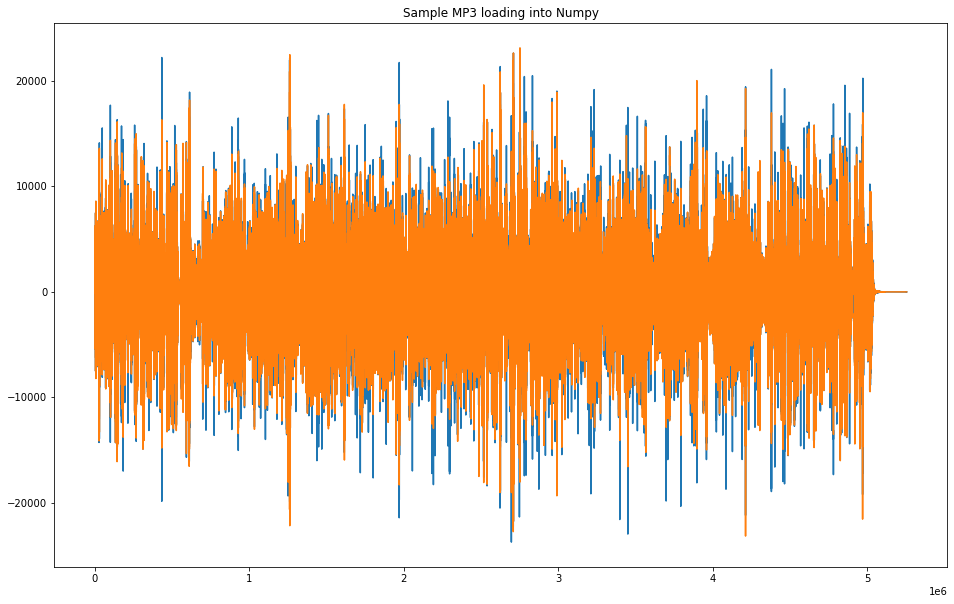

In [20]:
def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")
    
audio_file = r"C:\Users\tyler\Dropbox\My PC (LAPTOP-7QD3C2IL)\Downloads\Voodoo Suite - Little Grass Shack.mp3"
sr, x = read(audio_file)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(x)
plt.title("Sample MP3 loading into Numpy")
plt.show()

In [ ]:
import pydub 
import numpy as np

f = r""
pydub.AudioSegment.ffmpeg = "way//to//ffmpeg.exe"

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

In [29]:
x[x[:,0]>56]

array([[58, 62],
       [60, 65],
       [70, 74],
       ...,
       [63, 41],
       [71, 47],
       [64, 46]], dtype=int16)

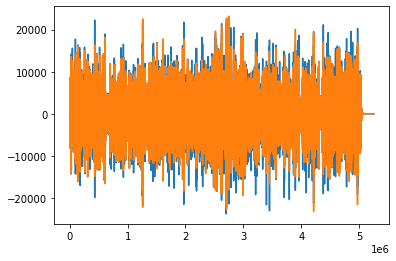

In [27]:
plt.plot(x)

In [30]:
import audio2numpy as a2n
x,sr=a2n.audio_from_file(f)

In [32]:
sr

44100

In [33]:
y,srz = a2n.audio_from_file(r"")

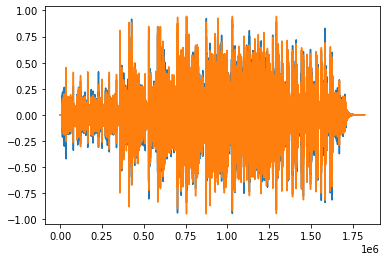

In [34]:
plt.plot(y)

In [37]:
y.shape

(1821312, 2)

In [39]:
import tarfile

In [41]:
file = tarfile.open(r"")

In [42]:
file

In [44]:
file.extractall(r'')

In [45]:
import h5py     
#f1 = h5py.File(file_name,'r+')    

In [48]:
trial = h5py.File(r"",'r+')

In [49]:
trial

<HDF5 file "TRANCCR12903C9CF6B.h5" (mode r+)>

In [56]:
data_matrix = np.random.uniform(-1, 1, size=(10, 3))
with h5py.File(r"", "r") as data_file:
    data_file.create_dataset("group_name", data=data_matrix)

In [57]:
data

['bars_confidence',
 'bars_start',
 'beats_confidence',
 'beats_start',
 'sections_confidence',
 'sections_start',
 'segments_confidence',
 'segments_loudness_max',
 'segments_loudness_max_time',
 'segments_loudness_start',
 'segments_pitches',
 'segments_start',
 'segments_timbre',
 'songs',
 'tatums_confidence',
 'tatums_start']